In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
class NaiveBayes():
    def __init__(self, m=300 , n=2):
        self.m = m
        self.n = n

    
    def fit(self, x, y):
        self.classes = np.unique(y)
        self.num_classes = len(self.classes)

        self.means_per_m_per_n = np.zeros((self.num_classes, self.n), dtype=float) # calc mean of xi per class, per feature
        self.vars_per_m_per_n = np.zeros((self.num_classes, self.n), dtype=float) # calc var of xi per class, per feature
        self.prob_of_ci = np.zeros((self.num_classes, 1), dtype=float) # get probabilty of class Ci

        for i, ci in enumerate(self.classes):
            x_in_ci = x[y==ci]
            self.means_per_m_per_n[i] = np.mean(x_in_ci, axis = 0)
            self.vars_per_m_per_n[i] = np.var(x_in_ci, axis = 0)
            self.prob_of_ci[i] = x_in_ci.shape[0]/self.m
        return self
    
    def predict(self, x):
        # Given a test_x, find the 
        # - probabilty of it belonging to C1 given all it's xi, 
        # - probabilty of it belonging to C2 given all it's xi and so on. 
        # Then return the max of all these probabilities, test_x belongs to that class that has the max 

        all_p_of_ci_xjs = []
        for i,ci in enumerate(self.classes):
            p_of_ci_xjs = self.prob_of_ci[i] # initialize P(Ci/(x1, x2....)) with P(Ci)
            # p_of_ci_xjs = np.log(self.prob_of_ci[i]) # alternative
            for j, xj in enumerate(x):
                pdf_p_of_xj_ci = 1./np.sqrt(2.* np.pi * self.vars_per_m_per_n[i][j]) * np.exp(- (xj - self.means_per_m_per_n[i][j])**2 / (2*self.vars_per_m_per_n[i][j]))
                p_of_ci_xjs = p_of_ci_xjs * pdf_p_of_xj_ci # multiply all the P(xj/Ci)'s to get P(Ci| x1, x2,.. xj)
                # p_of_ci_xjs = p_of_ci_xjs + np.log(pdf_p_of_xj_ci) # alternative
            all_p_of_ci_xjs.append(p_of_ci_xjs)
        print (all_p_of_ci_xjs)
        return self.classes[np.argmax(all_p_of_ci_xjs)], np.max(all_p_of_ci_xjs)

[array([0.02957827]), array([8.51781324e-12])]
[6. 6.] belongs to class 0 with probability 0.02957826829822253


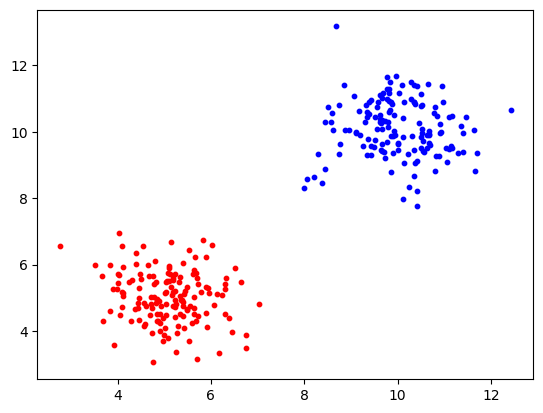

In [57]:
from sklearn.datasets import make_blobs

centers = [(5, 5), (10, 10)]
cluster_std = [0.8, 0.8]

x, y = make_blobs(n_samples=300, cluster_std=cluster_std, centers=centers, n_features=2, random_state=1)
# y = np.where(y==0, -1, 1)
plt.scatter(x[y == 0, 0], x[y == 0, 1], color="red", s=10, label="Cluster1")
plt.scatter(x[y == 1, 0], x[y == 1, 1], color="blue", s=10, label="Cluster2")

nb = NaiveBayes(m = 300, n = 2)
nb.fit(x,y)
test_x = np.array([6.,6.])
c, prob = nb.predict(test_x)
print(test_x, "belongs to class", c, "with probability", prob)
